In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

In [160]:
def random(n, s, a, m):
    rand, rands = s, []
    while len(rands) < n:
        rands.append(rand)
        rand = rand * a % m
    return np.array(rands, dtype=float) / float(m)

In [170]:
def plot_rand(filename, s, a, m):
    k = 5
    fig, axs = plt.subplots(k,2, sharex='col', figsize=(10,10))
    N = 1000
    randoms = random(N, s, a, m)

    for i in range(0,k):
        n = int(N/k * (i+1))

        moments = moment(randoms[0:n], [1,2,3])
        print(moments)
        axs[i][0].hist(randoms[0:n], bins=11)
        axs[i][0].set(title=f'n = {n}', xlabel="$I_j$", ylabel="$N(I_j)$")
        axs[i][1].plot(randoms[0:n][:-1], randoms[0:n][1:], marker='.', linewidth=0.1, markersize=0.5)
        axs[i][1].set(xlabel="$I_j$", ylabel="$I_{(j + 1)}$")
    fig.tight_layout()
    fig.savefig(f'out/{filename}')

[ 0.          0.08800177 -0.00262691]
[ 0.          0.09175628 -0.00214336]
[ 0.          0.09046849 -0.00312298]
[ 0.          0.08951391 -0.00252568]
[ 0.          0.0870784  -0.00287699]
[0.         0.06640625 0.        ]
[0.         0.06640625 0.        ]
[0.         0.06640625 0.        ]
[0.         0.06640625 0.        ]
[0.         0.06640625 0.        ]


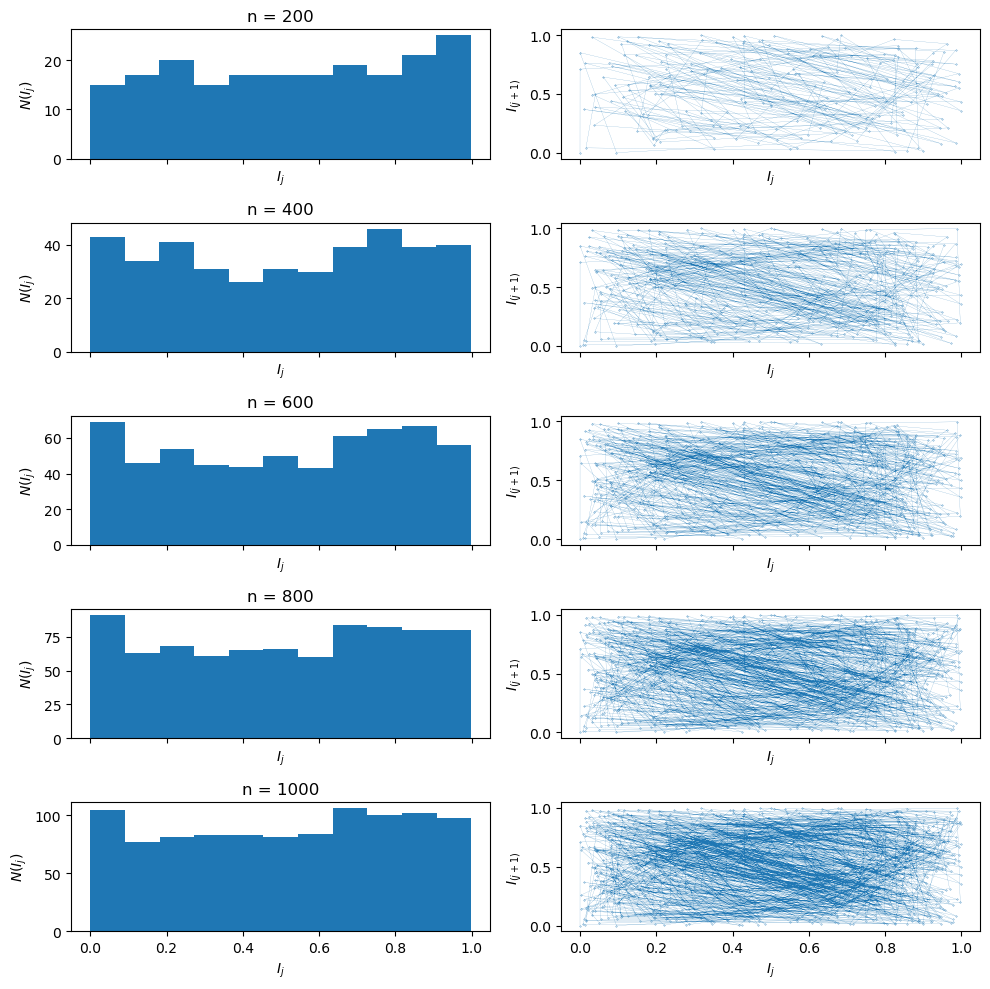

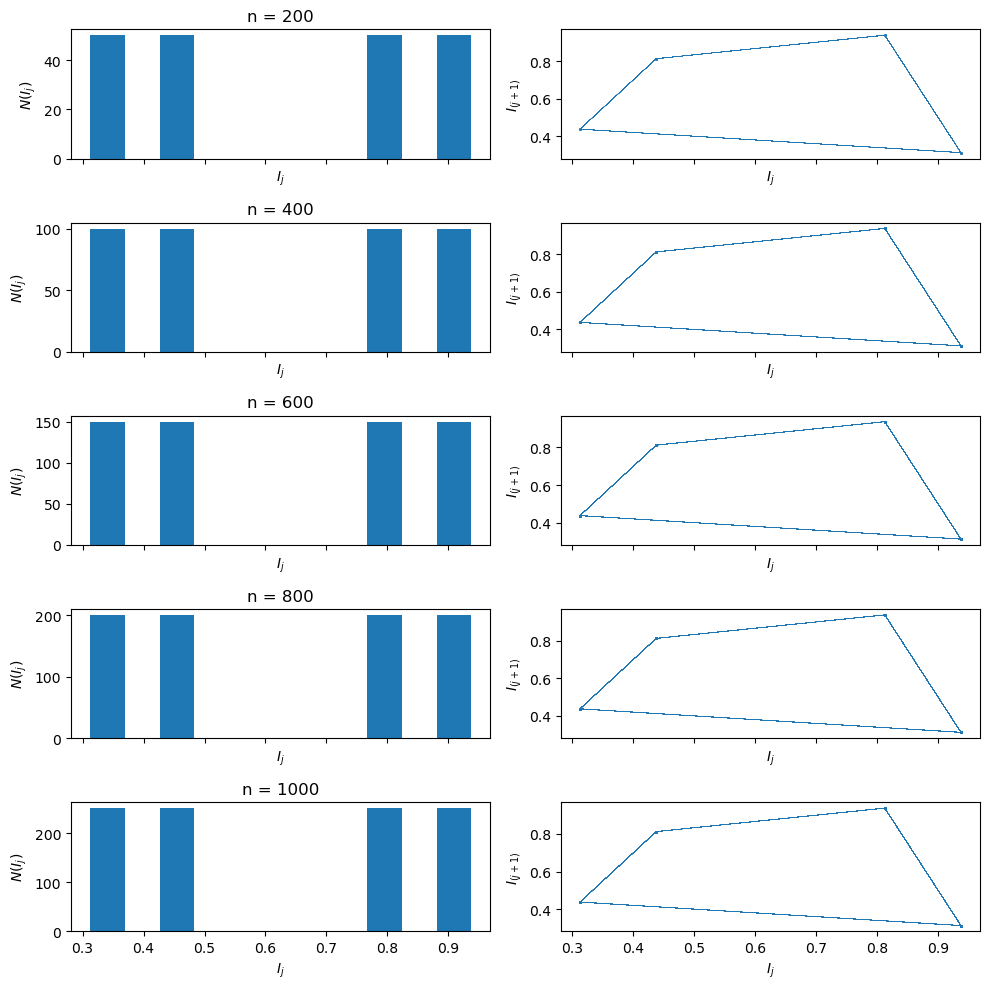

In [177]:
plot_rand("good_params_rand", s=13, a=7**5, m=2**31 - 1)
plot_rand("bad_params_rand", s=7, a=11, m=16)


The choice of values for s, a, and m in an LCG can significantly affect the quality of the generated random numbers. Here are some general guidelines for choosing these values:

m should be a large prime number, or a power of a large prime number.
a should be a primitive root modulo m, meaning that the powers of a modulo m should generate all the integers from 1 to m-1 (excluding 0).
s should be a relatively prime integer to m and a, and also not too small or too large.
Some commonly used values for m, a, and s include:

m = 2^31 - 1, a = 7^5, s can be any integer between 0 and m-1.
m = 2^32, a = 1103515245, s can be any integer between 0 and m-1.
m = 2^64, a = 6364136223846793005, s can be any integer between 0 and m-1.
Note that these are just examples, and there are many other possible choices of parameters for an LCG. The most important thing is to ensure that the parameters satisfy the above criteria for good randomness.